In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
data = pd.read_csv("Social_Network_Ads.csv")

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [55]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [106]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#VISUALISING THE DATA

C:\Users\Shilpa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


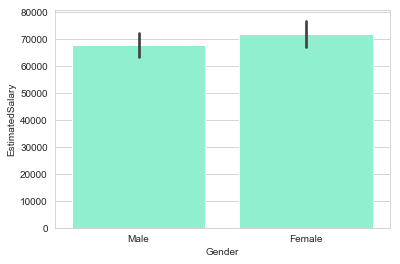

In [57]:
sns.barplot(data.Gender , data.EstimatedSalary , color = "aquamarine")
plt.show()

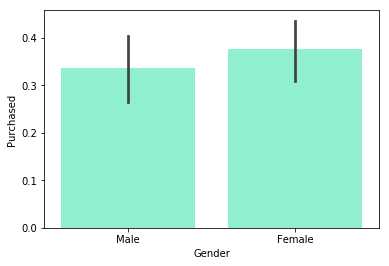

In [11]:
sns.barplot(data.Gender , data.Purchased , color = "aquamarine")
plt.show()

In [58]:
data_gender=data.loc[:,(['Gender','EstimatedSalary'])]
data_gender.groupby('Gender').describe()

EstimatedSalary                                                         \
                 count          mean           std      min      25%      50%   
Gender                                                                          
Female           204.0  71759.803922  35595.236189  15000.0  44000.0  70500.0   
Male             196.0  67642.857143  32421.819181  15000.0  43000.0  68000.0   

                           
            75%       max  
Gender                     
Female  90750.0  150000.0  
Male    86000.0  150000.0

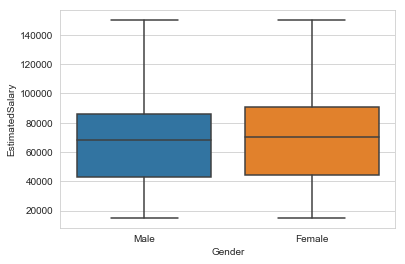

In [59]:
sns.set_style("whitegrid")
sns.boxplot(x='Gender',y='EstimatedSalary',data=data_gender)
plt.show()

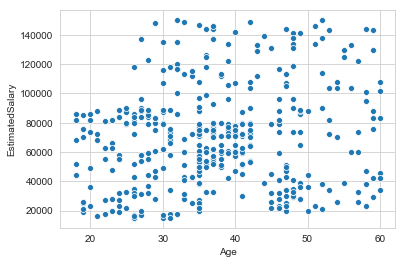

In [60]:
sns.scatterplot(data.Age , data.EstimatedSalary)

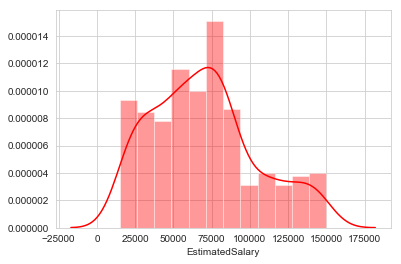

In [61]:

sns.distplot( data["EstimatedSalary"] , color="red", label="EstimatedSalary")
plt.show()


In [107]:
data = data.drop("User ID" , axis=1)

In [108]:
target = data["Purchased"]
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [109]:
data = data.drop("Purchased" , axis=1)

In [110]:
#converting some var's into categorical var
#Create categorical var's

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Gender'] = labelencoder.fit_transform(data['Gender'])


In [111]:
data.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [112]:
#Splitting the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target , test_size=0.3, random_state=40)

In [113]:
x_train.shape

(280, 3)

In [114]:
x_test.shape

(120, 3)

In [115]:
y_train.shape

(280,)

In [116]:
y_test.shape

(120,)

In [117]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model = model.fit( x_train,y_train )

In [118]:
model.score( x_train,y_train)

0.8464285714285714

In [119]:
model.coef_

array([[1.33007243e+00, 1.39615059e+02, 2.83992458e-02]])

In [120]:
model.intercept_

array([-8122.40043296])

In [121]:
y_pred = model.predict(x_test)

In [122]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [123]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[74  3]
 [20 23]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        77
           1       0.88      0.53      0.67        43

   micro avg       0.81      0.81      0.81       120
   macro avg       0.84      0.75      0.77       120
weighted avg       0.82      0.81      0.79       120



In [124]:
Acc = (74+23)/(74+23+3+20)

In [125]:
Acc

0.8083333333333333

In [126]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly', degree=8 ,gamma = 'auto')  
svclassifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [127]:
y_pred = svclassifier.predict(x_test)

In [128]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [89]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[ 0 77]
 [ 0 43]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.36      1.00      0.53        43

   micro avg       0.36      0.36      0.36       120
   macro avg       0.18      0.50      0.26       120
weighted avg       0.13      0.36      0.19       120



C:\Users\Shilpa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shilpa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shilpa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [101]:
acc = (0+43)/(77+43)

In [102]:
acc

0.35833333333333334

In [95]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid', gamma = 'scale')  
svclassifier.fit(x_train, y_train )  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [96]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[ 0 77]
 [ 0 43]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.36      1.00      0.53        43

   micro avg       0.36      0.36      0.36       120
   macro avg       0.18      0.50      0.26       120
weighted avg       0.13      0.36      0.19       120



C:\Users\Shilpa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shilpa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shilpa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [99]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf' , gamma = 'scale')  
svclassifier.fit(x_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [100]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[ 0 77]
 [ 0 43]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.36      1.00      0.53        43

   micro avg       0.36      0.36      0.36       120
   macro avg       0.18      0.50      0.26       120
weighted avg       0.13      0.36      0.19       120



C:\Users\Shilpa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shilpa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shilpa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
